In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [2]:
# Parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500          # Cut texts after this number of words
batch_size = 32
epochs = 5

In [3]:
# Load the IMDB dataset
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

Loading data...
17464789/17464789 [==============================] - 3s 0us/step
25000 train sequences
25000 test sequences


In [4]:
# Pad sequences to make them all the same length
print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [5]:
# Build the model
model = keras.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)               

In [6]:
# Train the model
print("Training...")
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Training...
Epoch 1/5


625/625 [==============================] - 26s 38ms/step - loss: 0.4541 - accuracy: 0.7741 - val_loss: 0.3325 - val_accuracy: 0.8590
Epoch 2/5
625/625 [==============================] - 23s 37ms/step - loss: 0.2690 - accuracy: 0.8922 - val_loss: 0.2913 - val_accuracy: 0.8788
Epoch 3/5
625/625 [==============================] - 23s 36ms/step - loss: 0.1968 - accuracy: 0.9257 - val_loss: 0.2930 - val_accuracy: 0.8850
Epoch 4/5
625/625 [==============================] - 23s 36ms/step - loss: 0.1363 - accuracy: 0.9528 - val_loss: 0.3545 - val_accuracy: 0.8652
Epoch 5/5
625/625 [==============================] - 23s 36ms/step - loss: 0.0831 - accuracy: 0.9737 - val_loss: 0.3503 - val_accuracy: 0.8806


In [7]:
# Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test score: {score:.3f}")
print(f"Test accuracy: {accuracy:.3f}")

782/782 [==============================] - 10s 13ms/step - loss: 0.3781 - accuracy: 0.8679
Test score: 0.378
Test accuracy: 0.868


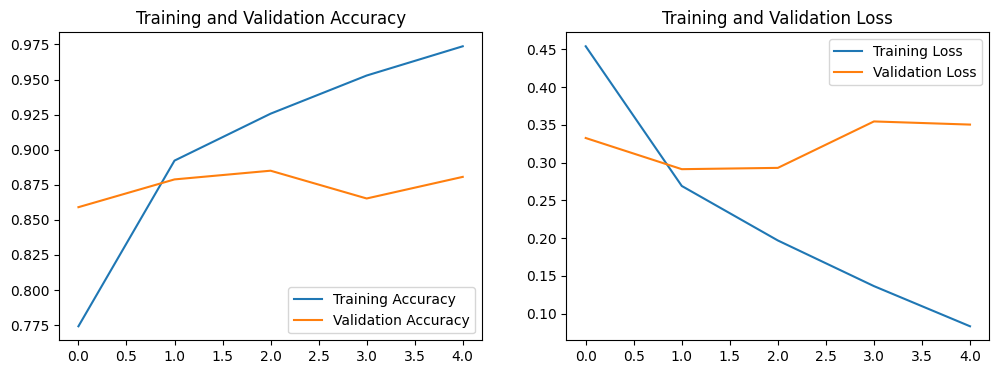

In [8]:
# Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

plot_history(history)

In [9]:
# Make predictions on some test samples
sample_texts = x_test[:5]
predictions = model.predict(sample_texts)
print("Sample predictions (close to 0 = negative, close to 1 = positive):")
print(predictions.flatten())

1/1 [==============================] - 0s 270ms/step
Sample predictions (close to 0 = negative, close to 1 = positive):
[2.7770724e-04 9.9999815e-01 1.2191609e-01 7.5391698e-01 9.9980479e-01]
